Показать на эксперименте, что верхняя оценка на вероятность коллизии композиционного хеша для строк выполняется $O(\frac{1}{m} + \frac{L}{p})$. Подробнее в материалах лекции.
Построить графики зависимости FPR от длинны строк L и простого модуля p.
Эксперименты провести для L = np.linspace(10, 100, 11) и 10 простых чисел p из интервала (100, 1000)
Для каждой точки выполнить 10 экспериментов, на графике отобразить стандартное отклонение оценки в каждой точке.


In [1]:
import numpy as np
from random import choice
from string import ascii_lowercase
from bitarray import bitarray
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

In [2]:
def get_strings(S, len_str):
    strings = set()
    
    while len(strings) != S:
        new_string = ''.join([choice(ascii_lowercase) for _ in range(len_str)])
        strings.add(new_string)
                
    return strings

In [3]:
def hash_int(x, p, a=30, b=4):
    return (a*x + b) % p

In [4]:
def poly_hash(s, p):
    h = 0
    x = 50
    for j in range(0, len(s)):
        h = (h * x + ord(s[j]) + p) % p
    return hash_int(h, p)

In [5]:
def get_fpr(S, L, p):
    fp = 0
    arr = bitarray('0' * p)

    strings = get_strings(S, L)
    
    for string in strings:
        h = poly_hash(string, p)
        
        if arr[h] == 0: 
            arr[h] = 1
        
        elif arr[h] == 1:
            fp += 1
    
#     print(fp)
            
    return fp * 2 / (S * (S - 1))

In [6]:
m = 1000

L_fpr = []
p_fpr = []

L = np.linspace(10, 100, 11)
p = [101, 211, 307, 401, 503, 601, 701, 809, 907, 997]

l_const = int(L[0])
p_const = p[-1]

for l in L:
    L_fpr.append(get_fpr(m, int(l), p_const))
    
for p_elem in p:
    p_fpr.append(get_fpr(m, l_const, p_elem))

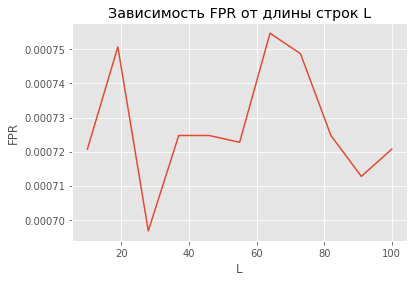

In [7]:
plt.plot(L, L_fpr)
plt.title('Зависимость FPR от длины строк L')
plt.xlabel('L')
plt.ylabel('FPR');

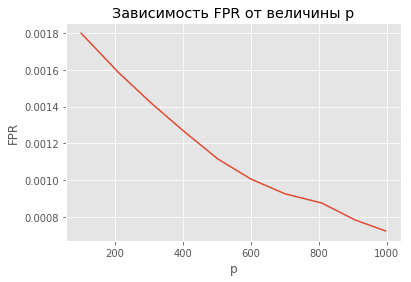

In [8]:
plt.plot(p, p_fpr)
plt.title('Зависимость FPR от величины p')
plt.xlabel('p')
plt.ylabel('FPR');

In [9]:
L_fpr_mean = []
L_fpr_std = []
p_fpr_mean = []
p_fpr_std = []

for l in L:
    lst = []
    for k in range(10):
        lst.append(get_fpr(m, int(l), p_const))
    L_fpr_mean.append(np.mean(lst))
    L_fpr_std.append(np.std(lst))
    
for p_elem in p:
    lst = []
    for i in range(10):
        lst.append(get_fpr(m, l_const, p_elem))
    p_fpr_mean.append(np.mean(lst))
    p_fpr_std.append(np.std(lst))

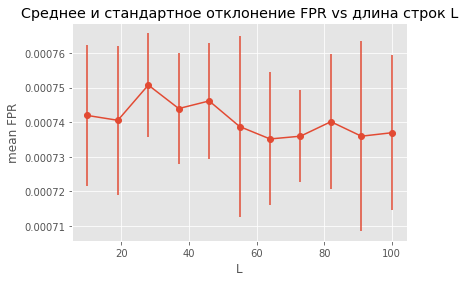

In [10]:
plt.errorbar(L, L_fpr_mean, L_fpr_std, fmt='-o')
plt.title('Среднее и стандартное отклонение FPR vs длина строк L')
plt.xlabel('L')
plt.ylabel('mean FPR');

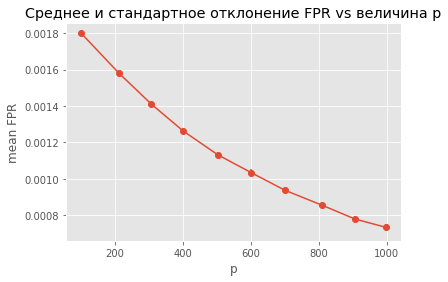

In [11]:
plt.errorbar(p, p_fpr_mean, p_fpr_std, fmt='-o')
plt.title('Среднее и стандартное отклонение FPR vs величина p')
plt.xlabel('p')
plt.ylabel('mean FPR');

Вероятность коллизии: $O(\frac{1}{m} + \frac{L}{p})$, в каждом эксперименте $m = 1000$.  
Тогда, согласно формуле, вероятность коллизии увеличивается при больших $L$ и при меньших $p$, последнее подтверждается результатами эксперимента с $p$. По результатам эксперимента с $L$ нельзя сделать таких выводов, поскольку нет монотонного возрастания функции.